# Eric Yarger
## Time Series Modeling

# Initial Setup

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
import platform
print(platform.python_version())

3.7.13


In [9]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/medical_time_date.csv')

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    object 
 1   Revenue  731 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [6]:
df.shape

(731, 2)

In [7]:
df.describe()

,Revenue
count,731.000000
mean,14.179608
std,6.959905
min,-4.423299
25%,11.121742
50%,15.951830
75%,19.293506
max,24.792249


In [8]:
df.head()

,Day,Revenue
0,1/1/2019,0.000000
1,1/2/2019,-0.292356
2,1/3/2019,-0.327772
3,1/4/2019,-0.339987
4,1/5/2019,-0.124888


In [9]:
df.isnull().any()

Day        False
Revenue    False
dtype: bool

## C1: Line Graph Visualization

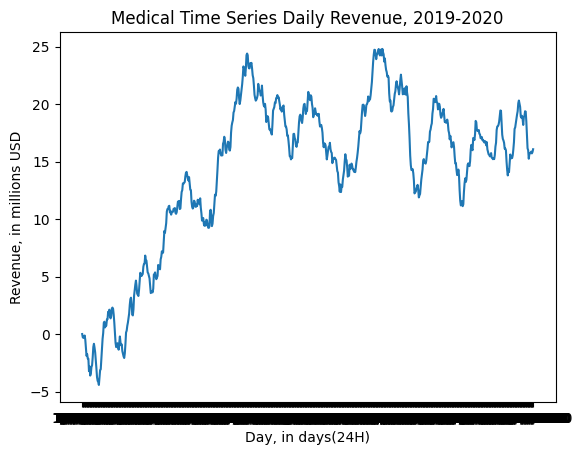

In [10]:
plt.plot(df['Day'],df['Revenue'])
plt.title('Medical Time Series Daily Revenue, 2019-2020')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Revenue, in millions USD')
plt.show()

# Data Cleaning

In [5]:

# Drop any null columns
df = df.dropna()

In [6]:
# Export cleaned data to excel file
#df.to_excel('C:/Users/ericy/Desktop/medical_time_clean.xlsx')

## C2: Time Step Formatting
### Set df['Date'] to Index

In [10]:
# Day to datetime
df['Day'] = pd.to_datetime(df['Day'], infer_datetime_format='True')

In [11]:
# Set Day as Index
df.set_index('Day',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  731 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [13]:
df.isnull().any()

Revenue    False
dtype: bool

In [14]:
# Export cleaned data to excel file
#df.to_excel('C:/Users/ericy/Desktop/medical_time_clean.xlsx')

## C3: Stationarity Analysis
### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [15]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [16]:
dicky_fuller_test

(-2.2183190476089485,
 0.19966400615064228,
 1,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 842.4530276176408)

In [17]:
# Results show p = .19964
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is non-stationary

## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

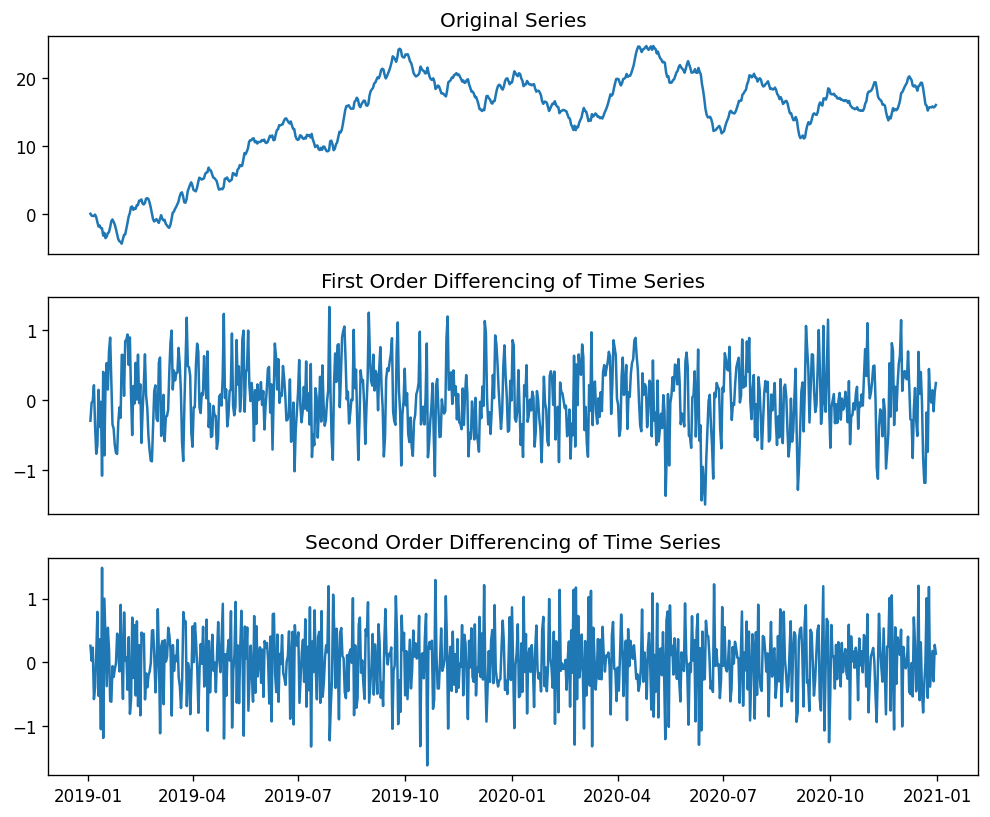

In [18]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [21]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")


Estimated differencing term: 1


# Seasonality Analysis

In [22]:
# Code Reference (Boston, 2020)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Revenue'])

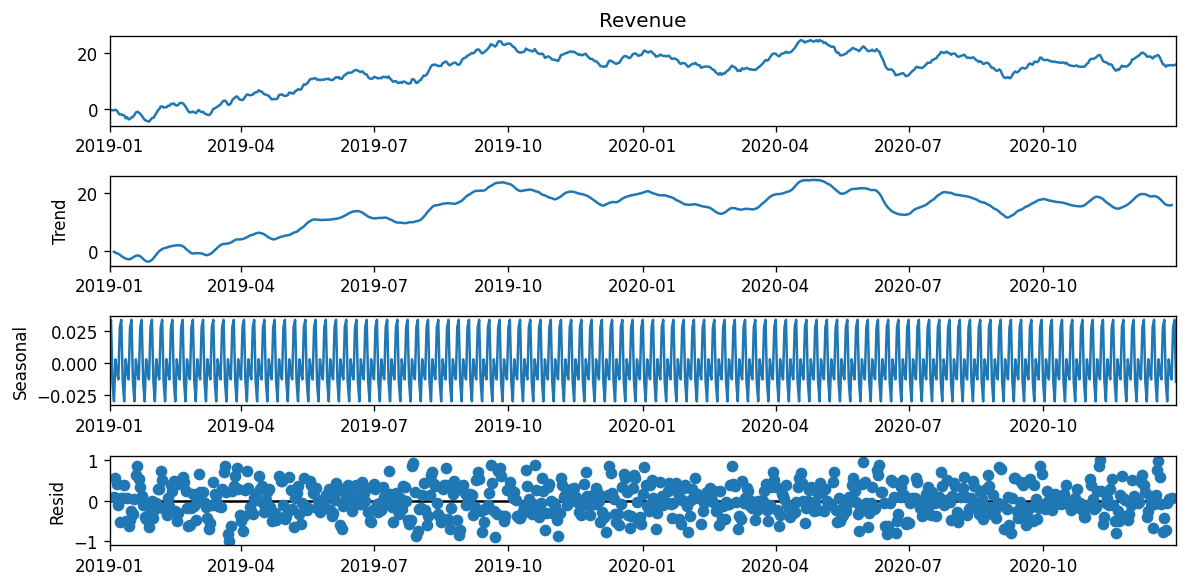

In [23]:
# plotting the result of our seasonal decomposition from the step above
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
result.plot();

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

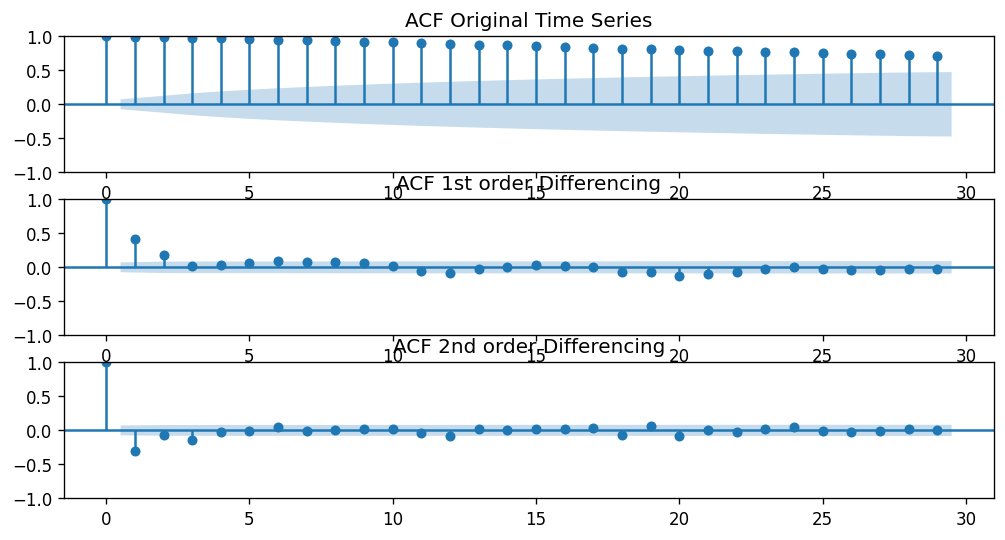

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

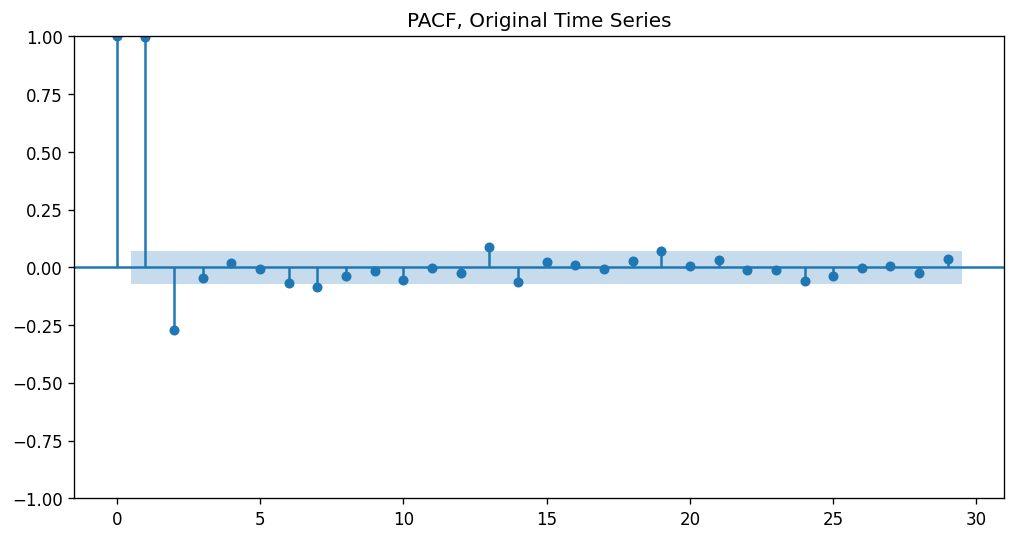

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
#Warnings ignored because this analysis uses deprecated ARIMA model from statsmodels
import warnings
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='PACF, Original Time Series');

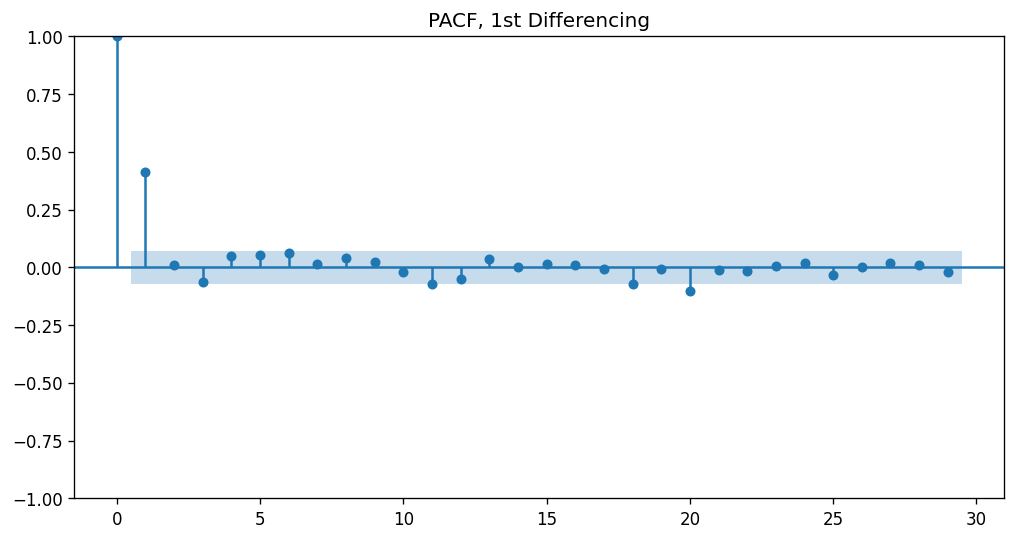

In [26]:

plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

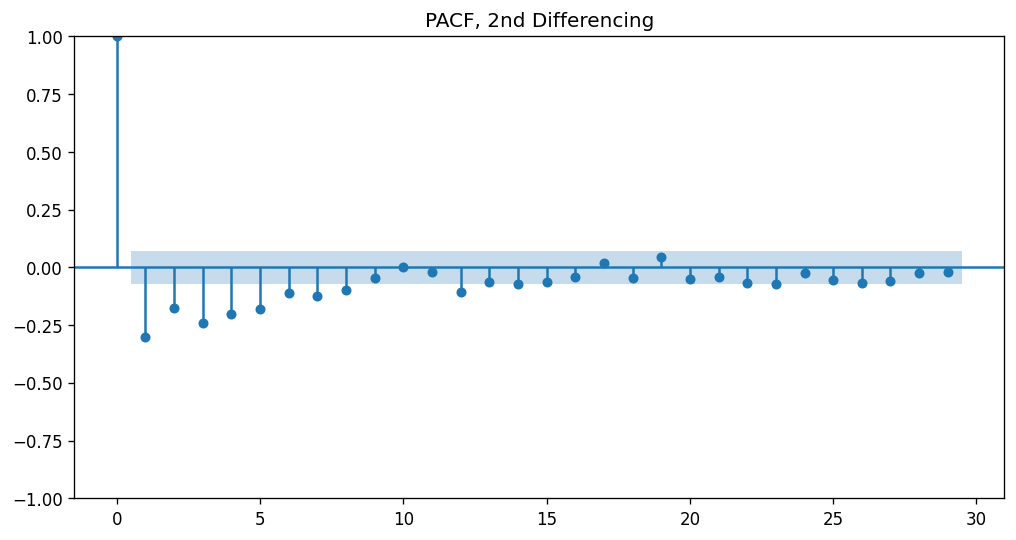

In [27]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# Spectral Density

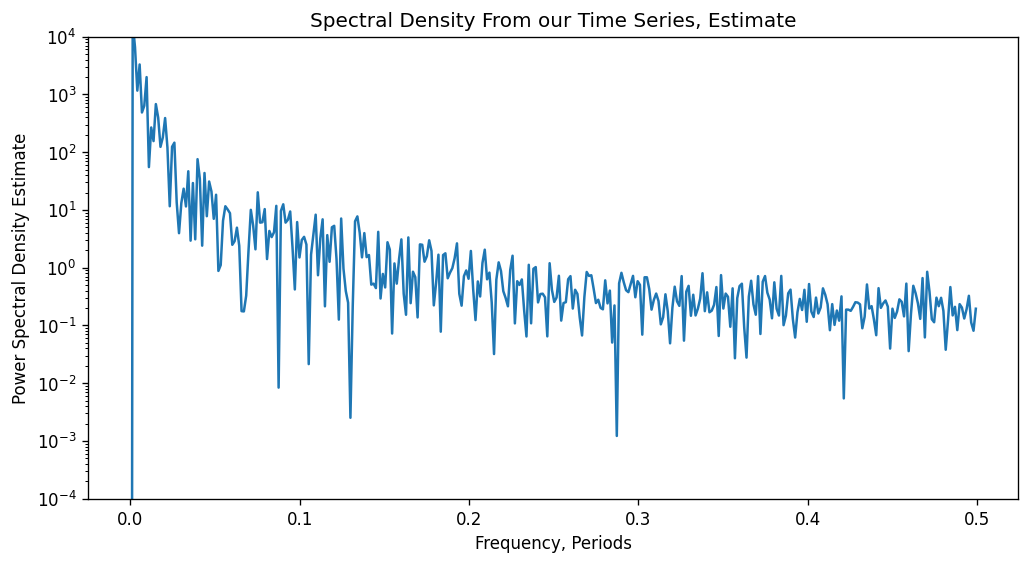

In [28]:
# Spectral Density
# Code Reference (Festus, 2022)
from scipy import signal

# signal periodogram
f, Pxx_den = signal.periodogram(df['Revenue'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-4, 1e4)

# Graph Title
plt.title('Spectral Density From our Time Series, Estimate')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

<AxesSubplot:xlabel='Day'>

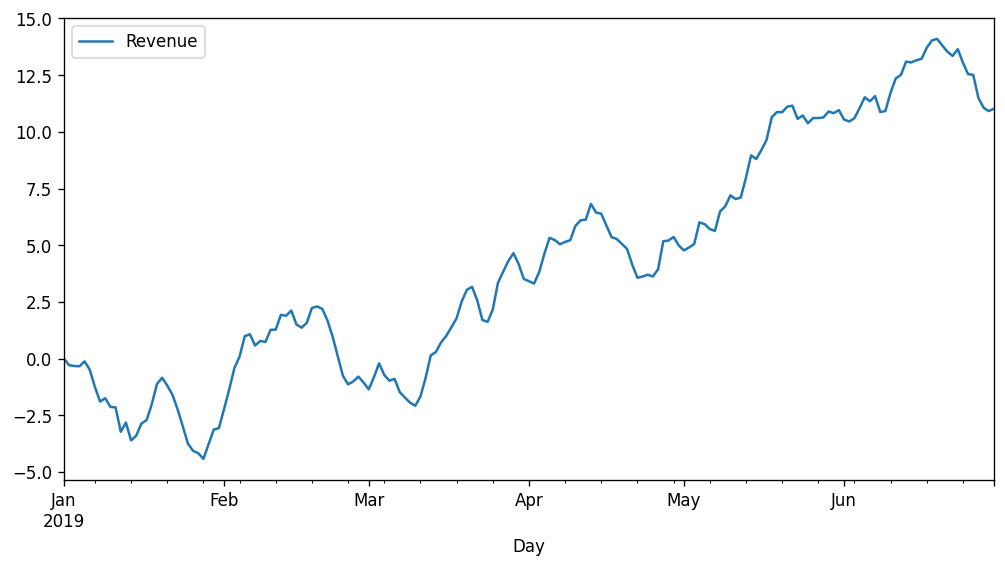

In [29]:
# Looking at specific location of plot
df.loc[:'2019-6-30'].plot()

# Create Train/Test Datasets

In [30]:
# Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)
from pmdarima.model_selection import train_test_split

y = df
train, test = train_test_split(y, train_size=548)

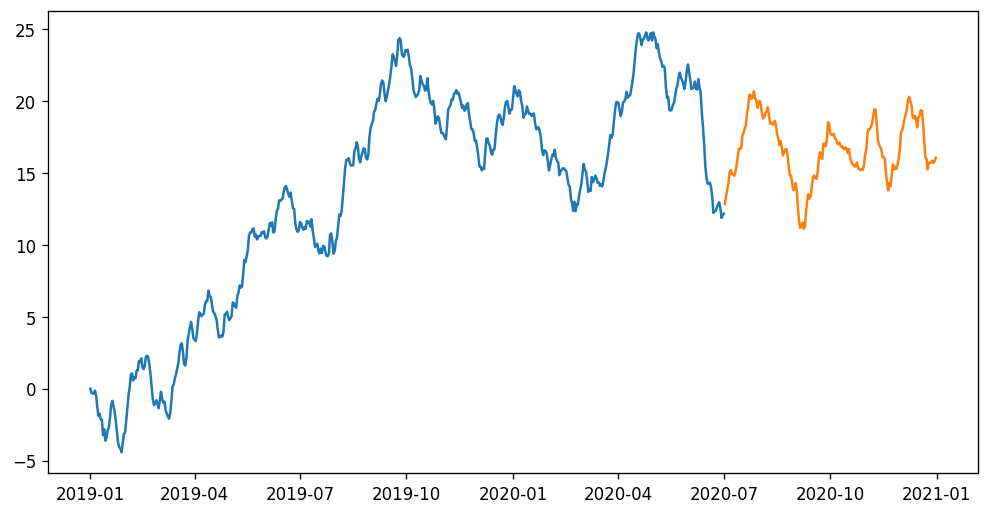

In [31]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [32]:
print(train.shape)
print(test.shape)

(548, 1)
(183, 1)


In [33]:
# Read out Test and Train sets to Excel file

test.to_excel('C:/Users/ericy/Desktop/medical_time_test_clean.xlsx')
train.to_excel('C:/Users/ericy/Desktop/medical_time_train_clean.xlsx')

# Auto-arima
## Using pmdarima's auto_arima

In [34]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=4,
                   max_q=4,
                   m=1,
                   d=1,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=672.789, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=767.938, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=671.106, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=691.699, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=767.938, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=672.640, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=671.553, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=671.106, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.844 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  548
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -332.553
Date:                Thu, 29 Sep 2022   AIC                            671.106
Time:                        12:06:21   BIC 

In [35]:
model.conf_int()

,0,1
intercept,-0.024364,0.050476
ar.L1,0.329751,0.482925
sigma2,0.172370,0.222511


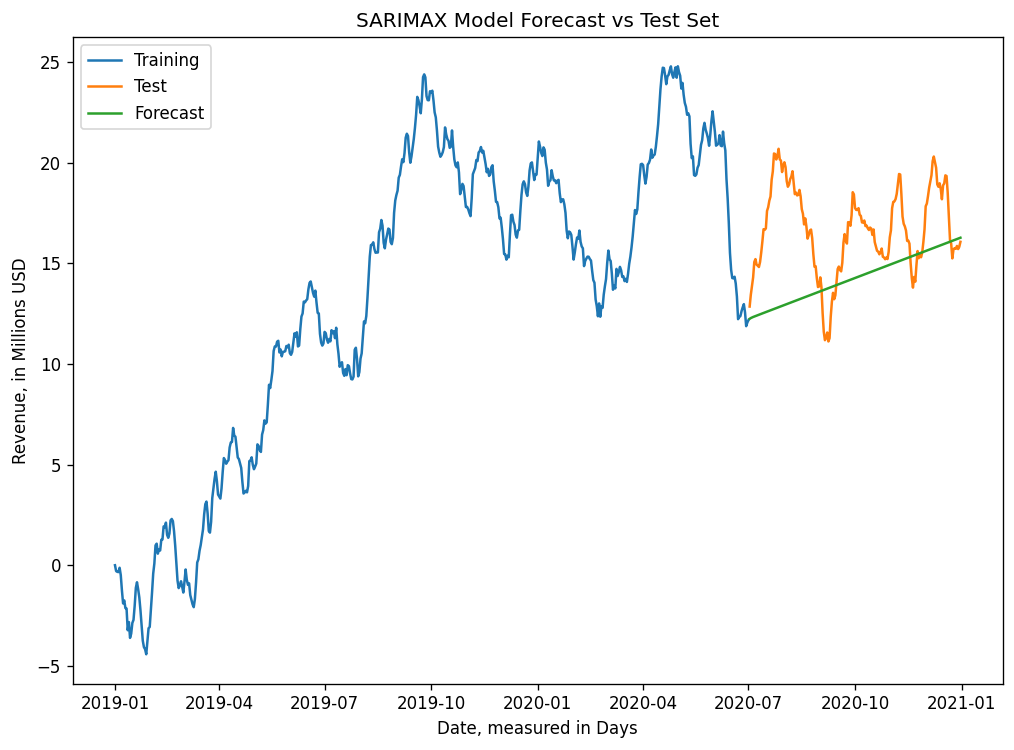

In [36]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 183),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_revenue']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Revenue, in Millions USD')

# Annotate Plot Title
plt.title('SARIMAX Model Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

# Accuracy Metrics for our forecast

In [37]:
# RMSE and MAE to test model accuracy

from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['Revenue']].to_numpy()
train[-1:]

,Revenue
Day,
2020-07-01,12.18032


In [39]:
test_array.shape

(183, 1)

In [40]:
# Predictions to numpy array
predicted_array = forecast[['forecast_revenue']].to_numpy()

In [41]:
predicted_array

array([[12.24289778],
       [12.28138171],
       [12.31007526],
       [12.3347906 ],
       [12.35788945],
       [12.38033145],
       [12.40250655],
       [12.4245732 ],
       [12.44659578],
       [12.46860045],
       [12.49059785],
       [12.51259229],
       [12.53458553],
       [12.55657829],
       [12.57857084],
       [12.60056331],
       [12.62255575],
       [12.64454818],
       [12.6665406 ],
       [12.68853302],
       [12.71052544],
       [12.73251786],
       [12.75451027],
       [12.77650269],
       [12.79849511],
       [12.82048753],
       [12.84247994],
       [12.86447236],
       [12.88646478],
       [12.9084572 ],
       [12.93044962],
       [12.95244203],
       [12.97443445],
       [12.99642687],
       [13.01841929],
       [13.0404117 ],
       [13.06240412],
       [13.08439654],
       [13.10638896],
       [13.12838137],
       [13.15037379],
       [13.17236621],
       [13.19435863],
       [13.21635105],
       [13.23834346],
       [13

In [42]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 3.3752492462072485


In [43]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

2.716608687477407


# E1 Revision

In [44]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

intercept    0.019092
ar.L1        0.039076
sigma2       0.012791
dtype: float64


In [45]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [46]:
# Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(183, return_conf_int=True, alpha=0.1)
print(conf_int)

[[ 1.15120186e+01  1.29737769e+01]
 [ 1.10201572e+01  1.35426062e+01]
 [ 1.06042529e+01  1.40158976e+01]
 [ 1.02505605e+01  1.44190207e+01]
 [ 9.94411230e+00  1.47716666e+01]
 [ 9.67322871e+00  1.50874342e+01]
 [ 9.42953411e+00  1.53754790e+01]
 [ 9.20711887e+00  1.56420275e+01]
 [ 9.00177412e+00  1.58914174e+01]
 [ 8.81044196e+00  1.61267590e+01]
 [ 8.63084764e+00  1.63503481e+01]
 [ 8.46125800e+00  1.65639266e+01]
 [ 8.30032245e+00  1.67688486e+01]
 [ 8.14696685e+00  1.69661897e+01]
 [ 8.00032138e+00  1.71568203e+01]
 [ 7.85967039e+00  1.73414562e+01]
 [ 7.72441689e+00  1.75206946e+01]
 [ 7.59405679e+00  1.76950396e+01]
 [ 7.46815985e+00  1.78649214e+01]
 [ 7.34635540e+00  1.80307106e+01]
 [ 7.22832142e+00  1.81927295e+01]
 [ 7.11377599e+00  1.83512597e+01]
 [ 7.00247068e+00  1.85065499e+01]
 [ 6.89418523e+00  1.86588202e+01]
 [ 6.78872323e+00  1.88082670e+01]
 [ 6.68590871e+00  1.89550663e+01]
 [ 6.58558323e+00  1.90993767e+01]
 [ 6.48760355e+00  1.92413412e+01]
 [ 6.39183969e+00  1

In [47]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [48]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [49]:
#Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/Low_Prediction_dt.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/High_Prediction_dt.csv')

In [50]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred.head()

,Day,Revenue
0,2020-07-02 00:00:00,11.372002
1,2020-07-03 00:00:00,10.778540
2,2020-07-04 00:00:00,10.277463
3,2020-07-05 00:00:00,9.851277
4,2020-07-06 00:00:00,9.481697


In [51]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred.head()

,Day,Revenue
0,2020-07-02 00:00:00,13.113794
1,2020-07-03 00:00:00,13.784223
2,2020-07-04 00:00:00,14.342688
3,2020-07-05 00:00:00,14.818304
4,2020-07-06 00:00:00,15.234082


## Convert Low and High Prediction 'Day' column to datetime and index

In [52]:
# Lower Predictions, Day to datetime
low_pred['Day'] = pd.to_datetime(low_pred['Day'])

In [53]:
# Lower Predictions, Set Day as Index
low_pred.set_index('Day',inplace=True)

In [54]:
# High Predictions, Day to datetime
high_pred['Day'] = pd.to_datetime(high_pred['Day'])

In [55]:
# High Predictions, Set Day as Index
high_pred.set_index('Day',inplace=True)

In [56]:
low_pred.head()

,Revenue
Day,
2020-07-02,11.372002
2020-07-03,10.778540
2020-07-04,10.277463
2020-07-05,9.851277
2020-07-06,9.481697


In [57]:
high_pred.head()

,Revenue
Day,
2020-07-02,13.113794
2020-07-03,13.784223
2020-07-04,14.342688
2020-07-05,14.818304
2020-07-06,15.234082


# SARIMAX Model Forecast, With Prediction Interval (CI 90%), Vs Test Set

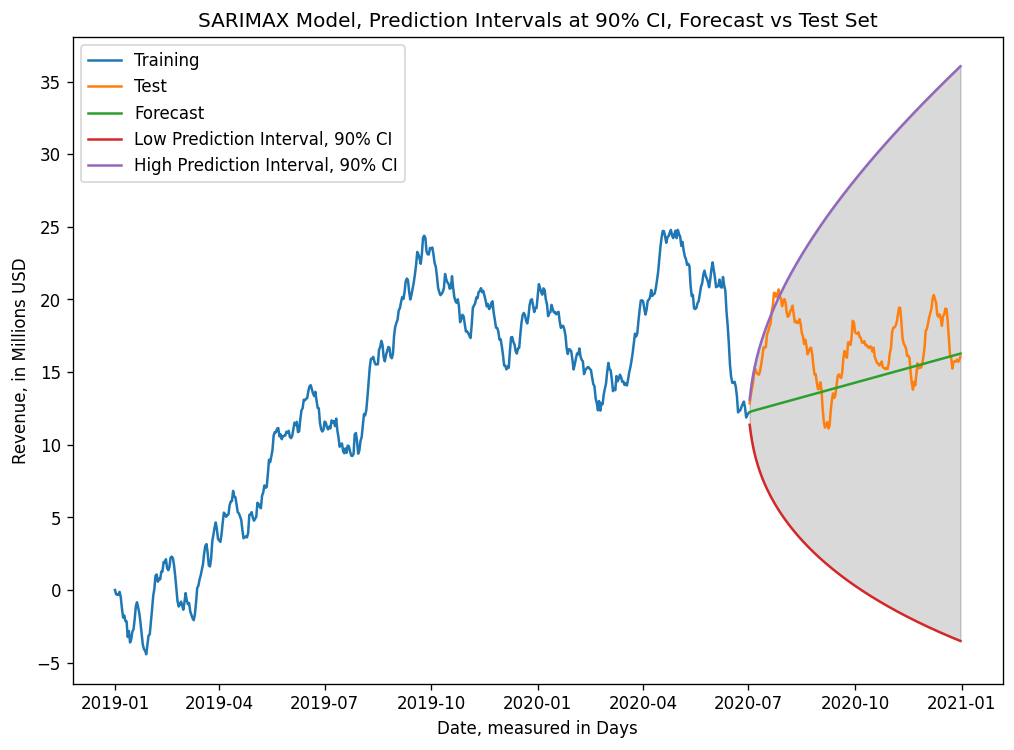

In [59]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 183),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_revenue']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Revenue, in Millions USD')

# Annotate Plot Title
plt.title('SARIMAX Model, Prediction Intervals at 90% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 90% CI')
plt.plot(high_pred,label='High Prediction Interval, 90% CI')
plt.fill_between(low_pred.index, low_pred['Revenue'], high_pred['Revenue'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()